### Smit Lunagariya

#### Implementation of Support Vector Regression

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator,RegressorMixin
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from cvxopt import matrix
from cvxopt import solvers
%matplotlib inline


In [2]:
x=np.linspace(-10.2,10,num=81).reshape(-1,1)
y=np.sin(x)/x
yhat=y+np.random.normal(scale=0.1,size=81).reshape(-1,1)

In [3]:
svr=SVR(epsilon=0.05,C=512,gamma=16)


In [4]:
svr.fit(x,yhat)

C:\Users\Smit Lunagariya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=512, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=16,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [5]:
pred=svr.predict(x)

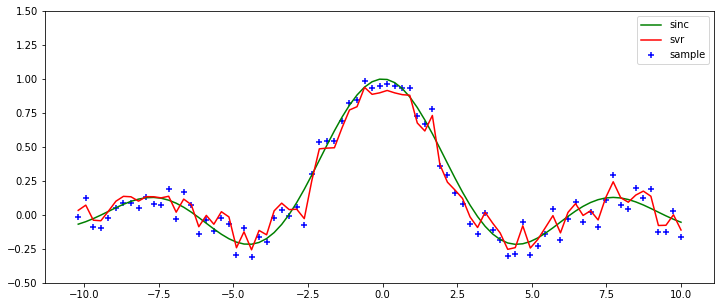

In [6]:
plt.figure(figsize=(12,5))
plt.plot(x,y,label='sinc',color='green')
plt.scatter(x,yhat,marker='+',label='sample',color='blue')
plt.plot(x,pred,label='svr',color='red')
plt.ylim([-0.5,1.5])
plt.legend()

In [7]:
#Evaluation of the results:
def Evaluation_of_result(y,ypred):
    def mean_abs_error(y,ypred):
        return mean_absolute_error(y,ypred)
    def root_mean_sq_error(y,ypred):
        return math.sqrt(mean_squared_error(y,ypred))
    def SSE(y,ypred):
        y.reshape(-1,1)
        ypred.reshape(-1,1)
        return mean_squared_error(y,ypred)*(y.shape[0])
    def SST(y):
        y.reshape(-1,1)
        return np.var(y)*(y.shape[0])
    def SSR(ypred):
        ypred.reshape(-1,1)
        return np.var(ypred)*(ypred.shape[0])
    print("MAE: ",mean_abs_error(y,ypred))
    print("RMSE: ",root_mean_sq_error(y,ypred))
    print("SSE: ",SSE(y,ypred))
    print("SSR: ",SSR(ypred))
    print("SST: ",SST(y))
    print("SSR/SST: ",SSR(ypred)/SST(y))
    print("SSE/SST: ",SSE(y,ypred)/SST(y))

In [8]:
print("The evaluation of results of Twin SVR are as follows:")
Evaluation_of_result(y,pred)

The evaluation of results of Twin SVR are as follows:
MAE:  0.06816676213972629
RMSE:  0.08182400649421781
SSE:  0.5423086111400297
SSR:  8.490671183254147
SST:  9.942618950174554
SSR/SST:  0.8539672721848687
SSE/SST:  0.05454383939057716
